In [7]:
import pandas as pd
import numpy as np
from pylab import *
from scipy.linalg import *
from scipy import signal 

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# Скользящее среднее

def average_array(arr, N):
    len_arr = len(arr)
    di = 0 if N%2==0 else 1
    result = np.zeros(len_arr)
    for i in range(len_arr):
        min_i = i - int(N/2) # индекс начала окна
        max_i = i + int(N/2) # индекс конца окна
        result[i] = np.average(arr[max(min_i, 0): min(max_i+di, len_arr)])
    return result

In [9]:
# Дифференцирование массива данных

def diff(x,y):
    #if len(x)!=len(y):
     #   return throw
    N = len(x)
    result = np.zeros(N)
    i=0   
    while i<N-1:
        result[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
        i+=1
    else:
        result[i] = result[i-1]
    return result

In [10]:
#Метод наименьших квадратов

def create_mnq_model(X, M): #X - массив данных, M - степень полинома для аппроксимации
    len_arr = len(X)
    model = []
    for i in range(M+1):
        model.append(time**(M-i))
    s1 = vstack(model).T
    return s1

def polynom_value(A, x):
    y=0
    for i in range(len(A)):
        y *= x
        y += A[i]
    return y

def approx_mnq(x, y, m):
    model = create_mnq_model(x, m)
    s = lstsq(model, y)[0]
    result = polynom_value(s, x)
    return result, s

def polynom_diff(A):
    len_diff = len(A)-1
    diff = np.zeros(len_diff)
    for i in range(len_diff):
        diff[i] = (len_diff - i) * A[i]
    return diff


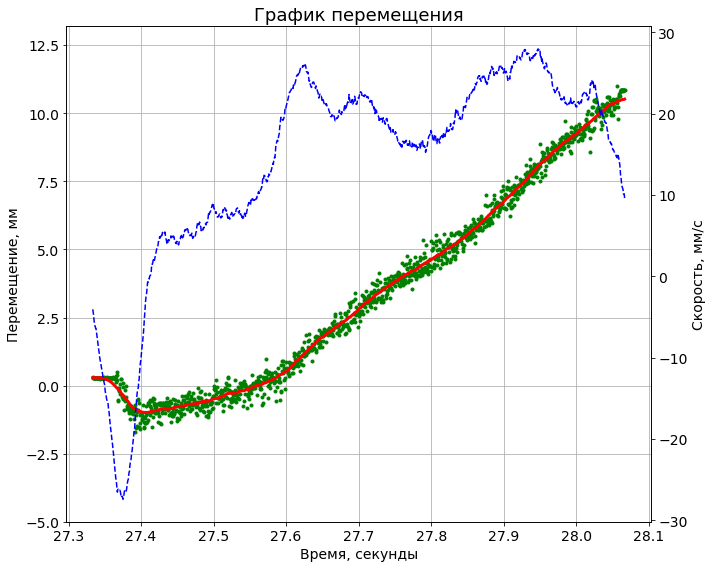

In [11]:
file_name = 'data1.xlsx'
#xl = pd.ExcelFile(file_name)  #Загрузка таблицы
#print(xl.sheet_names)    #Печать названий листов
#df1 = xl.parse('WinPos') #Загрузка листа во фрейм данных df1
#print(df1)

with open(file_name, 'r') as f:
    data_table = pd.read_excel(file_name, index_col=None, header = None)
    #df1 = xl.parse('WinPos')

#print(data_table.shape)
#print(data_table.info())
#print(data_table.iloc[:5,:5])

time = np.array(data_table[0][:-75])
data = np.array(data_table[1][:-75])
average_data = average_array(data, 75)

data_diff = diff(time, average_data)
average_diff = average_array(data_diff, 75)


#plt.style.use('seaborn')
#plt.style.use('style/elegant.mplstyle')

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim(ymin=-5, ymax=max(data)*1.2)
ax.plot(time, data, 'g.')
ax.plot(time, average_data, 'r', linewidth = 3)
ax.set_xlabel('Время, секунды', fontsize = 14)
ax.set_ylabel('Перемещение, мм', fontsize = 14)
ax.set_title("График перемещения", fontsize = 18)
ax.tick_params(axis="both", labelsize = 14)
ax.grid(axis = 'both')

ax2 = ax.twinx()
ax2.plot(time, average_diff, 'b--')
ax2.set_ylabel('Скорость, мм/с', fontsize = 14)
ax2.tick_params(labelsize = 14)
fig.tight_layout()

plt.savefig('fig')

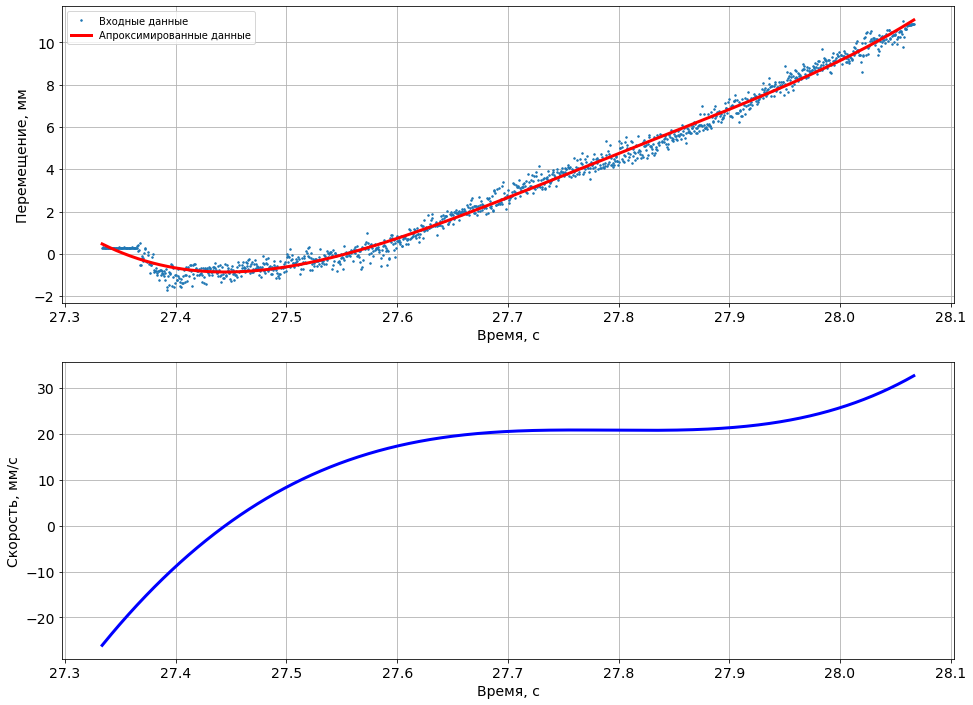

In [12]:
aprox_data, s = approx_mnq(time, data, 10)
s_diff = polynom_diff(s)

fig, ax = plt.subplots(2, 1, figsize=(16, 12))
ax[0].plot(time, data, '.', label='Входные данные', markersize=3)
ax[0].plot(time, aprox_data, 'r-', label='Апроксимированные данные', linewidth = 3)
ax[0].set_ylabel('Перемещение, мм', fontsize = 14)
ax[0].set_xlabel('Время, с', fontsize = 14)
ax[0].tick_params(labelsize = 14)

ax[1].plot(time, polynom_value(s_diff, time), 'b-', linewidth = 3)
ax[1].set_ylabel('Скорость, мм/с', fontsize = 14)
ax[1].set_xlabel('Время, с', fontsize = 14)
ax[1].tick_params(labelsize = 14)

ax[0].legend()
ax[0].grid()
ax[1].grid()
plt.savefig('polynom.pdf', format='pdf')